#Logistic Regression

- Problem Statement:Survived or not survived(Dependet variable(i.e y) is categorical);

-- Based upon attributes predict whether the person survived or not

- Anaytic Approach -> Classification

-- Durvived -> DV -> Categorical

Data Req and Data Collection
(Already Done )

- Data understanding

-- PassengerId -> Not Required

-- Survived -> DV (0 or 1 ; where 0 means not survived and 1 means Survived) : CATEGORICAL

-- Pclass -> Passenger Class(Categorical(First Class, 2nd, 3rd,...))

-- Name -> Not required (as all are different and does not decided survival)

-- Sex -> Categorical

-- Age ->Numerical

-- Sbisp -> Sibling, spouse -> Numrical

-- Parch -> Prant Child -> NUmerical

-- Ticket ->Not Required(All are different)

-- Fare -> Not required (Already included in Pclass)

-- Cabin ->Object (Looks imp as which cabin lead to more danger, but it has lots of missing values which is then not sufficient to predict the survival)

-- Embarked -> Port (Categorical)

Data preparation

Modelling and Evaluation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  #In ALL ML algorithms the data has to be split into trai and test data


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

Data eXPLOration

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S


Survived 0,1 is not numerical but ORDINAL

Nan are the MISsing values

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-- LOts of missing values in cabin out of 891,we have 687 missing values so predicting from only this much is not a good idea

-- Exmbarked only 2 missing values, can be replaced by mode.

-- Age also the missing values can be replace by median.

*NOte that: Matheatically the overall statistical parameters (that is the mean,median or mode) remais the same even if the missing values were replaced by the mean,median or mode.

<Axes: xlabel='Survived', ylabel='count'>

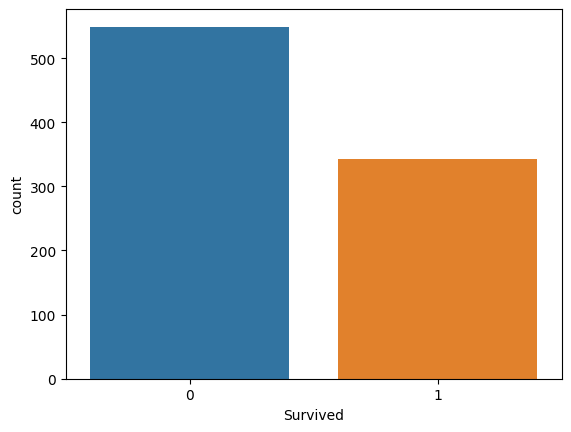

In [ ]:
sns.countplot(x="Survived",data=df) #Visual_represenation of no. of survivors

In [ ]:
df["Survived"].value_counts() #gives the actual count of the survivors

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

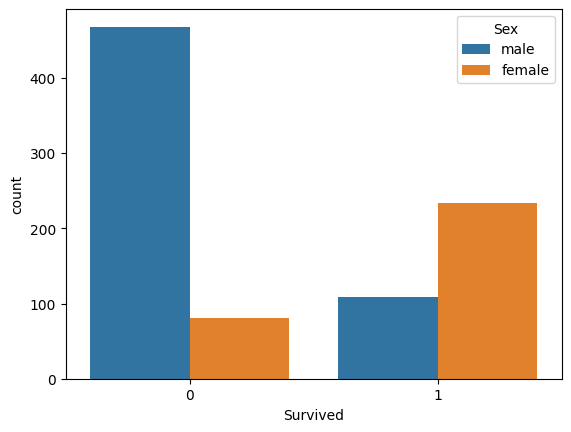

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=df)  #Visual 

In [ ]:
pd.crosstab(df["Survived"],df["Sex"])   #count in tabular form #pandas

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

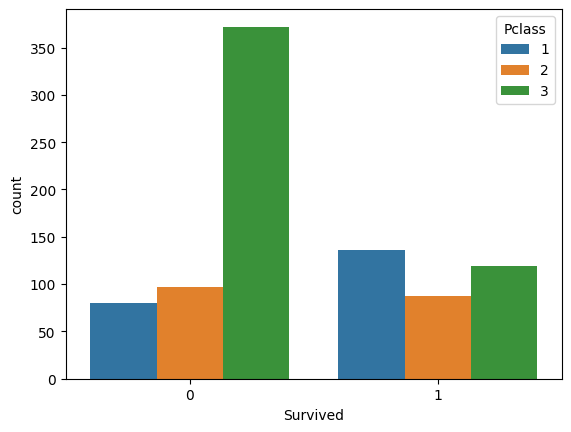

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=df)  #visua-> countplot #from SEABORN

In [ ]:
pd.crosstab(df["Survived"],df["Pclass"])  #count in table for #from PANDAS


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Age'>

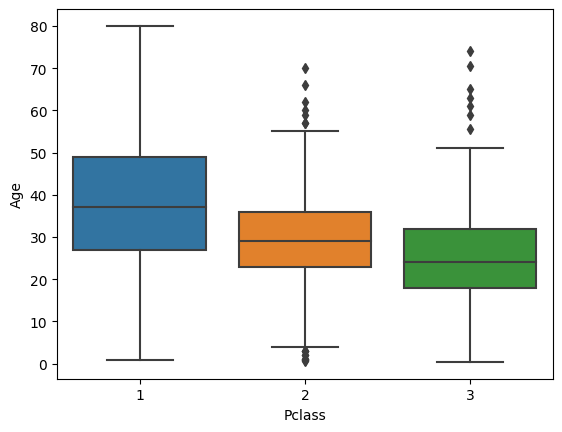

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=df) 
#one numerical(Age) and other categorical(Pclass) attribute

In [ ]:
#dropping the unwanted columns
df=df.drop("Cabin",axis=1) 

In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


FOR Example: At Sno.888, The Age is Nan

In [ ]:
###droppin the missing values
df=df.dropna()

HERE, Instead of replacing the missing values with mean,median or mode

We have dropped all the missing values.

In [ ]:
df.isnull().sum()
#There exists NO missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape
#reduced rows bcoz; the rows with missing values has been dropped

(712, 11)

In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


Note: 888 row has been removed, as its age column has Nan

In [ ]:
#ONE HOT ENCODING
df=pd.get_dummies(columns=["Sex","Embarked","Pclass"],data=df)

In [ ]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [ ]:
#dropping the unwanted  columns
df=df.drop(["PassengerId","Name","Ticket"],axis=1)

In [ ]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

- All atributes are numerical type

In [ ]:
###Split into x and y
x=df.drop("Survived",axis=1) #except survived column all other are IDV
y=df["Survived"] #Survived is DV
 

In [ ]:
#Training and Test split 
#Train and test size in ratio 70:30
#random state ensures fixed outcome of score(It's like FREEZE the Score)-- you can avoid it also
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
###Apply logistic Regeression model
model_1=LogisticRegression()


In [ ]:
model_1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_1.score(x_train,y_train)

0.8032128514056225

In [ ]:
model_1.score(x_test,y_test)     #Returns score: Mean accuracy of self.predict(X) w.r.t. y.

0.7757009345794392

How can the Scores be improved??

By replacing the missing values with appropriate required mean,median or mode.


- Now, we want to predict for the test data.

In [ ]:
predictions=model_1.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions) 

0.7757009345794392

The above result is same as the result for test data in line 101

Axes(0.125,0.11;0.62x0.77)


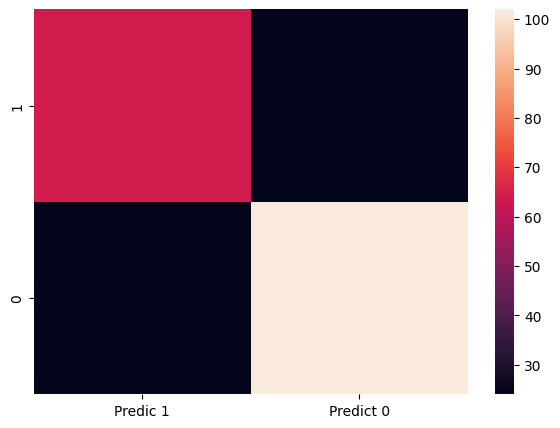

In [ ]:
#confusion_matrix
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0]) #y_test : are the true values
#predictions : are the values predicted by the model from test data (i.e x_test)
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predic 1","Predict 0"]])
plt.figure(figsize=(7,5))

print(sns.heatmap((df_cm)))


Axes(0.125,0.11;0.62x0.77)


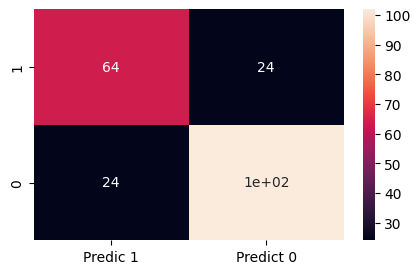

In [ ]:
plt.figure(figsize=(5,3))  #length,breadth
print(sns.heatmap(df_cm,annot=True))  #output number in scientific notation

Axes(0.125,0.11;0.62x0.77)


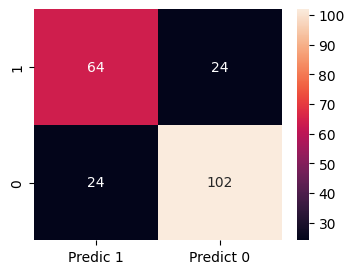

In [ ]:
plt.figure(figsize=(4,3))  #length,breadth
print(sns.heatmap(df_cm,annot=True,fmt='g'))  #output number NOT in scientific notation

# Metrics

TP(True_Positive)=64

TN(True_Negative)=102

FN(False_Negative)=24

FP(False Positive)=24

Total=65+23+24+102=214

Note that intially after dropping all the missing values that is in a prepared data we had 712 rows that data of count 712.

30% of 712=213.6 ~ 214 [This was the TEST SIZE]

-Accuracy -> Measure of correct data

Accuracy=(TP+TN)/(TP+TN+FP+FN) = 0.7757009346 {same as the ACCURACY SCORE as computed above}

-Recall -> out of actual positive how may are true

Recall(R)= TP/AP = TP/(TP+FN)

-Precision -> out of predicted postive how many are true

Precision(P)= TP/(FP+TP)

- F1 score = 2(P*R) / (P+R)





# SVM 
 Support Vector Machine
 

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_2=SVC()             #kernel = 'rbf' is DEFAULT

In [ ]:
model_2.fit(x_train,y_train)

SVC()

In [ ]:
model_2.score(x_train,y_train)

0.678714859437751

In [ ]:
model_2.score(x_test,y_test)

0.6542056074766355

How to improve the score??

- kernel !

Try different kernels and see for whcih kernel the score is highest that will be the apt model.

In [ ]:
#1for kernel = Linear
model_2=SVC(kernel='linear')

In [ ]:
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.7811244979919679

In [ ]:
model_2.score(x_test,y_test)

0.7757009345794392

In [ ]:
#2for kernel = poly
model_2=SVC(kernel='poly')
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.6285140562248996

In [ ]:
model_2.score(x_test,y_test)

0.6214953271028038

In [ ]:
#3for kernel = sigmoid
model_2=SVC(kernel='sigmoid')
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.5963855421686747

In [ ]:
model_2.score(x_test,y_test)

0.5420560747663551

In [ ]:
#4for kernel = precomputed
model_2=SVC(kernel='sigmoid')
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.5963855421686747

In [ ]:
model_2.score(x_test,y_test)

0.5420560747663551

From the aboce codes; the kernel='Linear'
is the best fit for the data, as the scores are high enough.

In [ ]:
#Using combinations of kernl,C,degree and Gamma to get the best score

#for kernel = Linear
model_2=SVC(kernel='linear',C=5)
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.7811244979919679

No change in the outcome for linear kernel

In [ ]:
model_2=SVC(kernel='poly',degree=5)
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)

0.6485943775100401

# DT
Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_3=DecisionTreeClassifier()

In [ ]:
model_3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_3.fit(x_test,y_test)

DecisionTreeClassifier()

In [ ]:
model_3.score(x_train,y_train)

0.7590361445783133

In [ ]:
model_3.score(x_test,y_test)   

1.0

Since there is always overfiting associated with the decision tree. So to overcome this, we have to do Pruning by giving max depth:-

In [ ]:
model_3=DecisionTreeClassifier(max_depth=30)

In [ ]:
model_3.fit(x_train,y_train)
model_3.score(x_train,y_train)

0.9919678714859438

In [ ]:
model_3.score(x_test,y_test)

0.7476635514018691